In [61]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

In [62]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])

In [63]:
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

In [64]:
class1_sample.shape

(3, 20)

In [65]:
mu_vec2=np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample=np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

In [66]:
class2_sample.shape

(3, 20)

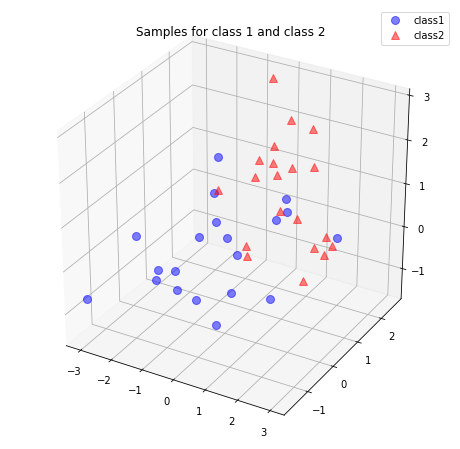

In [67]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show() 

In [68]:
all_samples=np.concatenate((class1_sample, class2_sample), axis=1)

In [69]:
all_samples.shape

(3, 40)

In [70]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)


Mean Vector:
 [[0.353122  ]
 [0.55237793]
 [0.644037  ]]


In [71]:
scatter_matrix=np.zeros((3,3))

In [72]:
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[71.35051152 17.97518381 18.39047354]
 [17.97518381 46.79697347  9.33529768]
 [18.39047354  9.33529768 53.31741427]]


In [73]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)


Covariance Matrix:
 [[1.8295003  0.46090215 0.4715506 ]
 [0.46090215 1.1999224  0.23936661]
 [0.4715506  0.23936661 1.36711319]]


In [74]:
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

In [75]:
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.78109713]
 [-0.40917495]
 [-0.47165998]]
Eigenvalue 1 from scatter matrix: 91.87170492787685
Eigenvalue 1 from covariance matrix: 2.355684741740432
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[-0.48822139]
 [ 0.87112063]
 [ 0.05280836]]
Eigenvalue 2 from scatter matrix: 37.28866063073471
Eigenvalue 2 from covariance matrix: 0.9561195033521714
Scaling factor:  39.00000000000003
----------------------------------------
Eigenvector 3: 
[[-0.38926488]
 [-0.27152295]
 [ 0.88019778]]
Eigenvalue 3 from scatter matrix: 42.30453369630037
Eigenvalue 3 from covariance matrix: 1.0847316332384704
Scaling factor:  39.00000000000002
----------------------------------------


In [76]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)


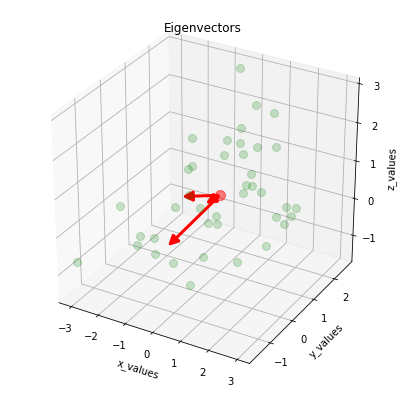

In [77]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [78]:
for ev in eig_vec_sc:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [79]:
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

In [80]:
print(eig_pairs)

[(91.87170492787685, array([-0.78109713, -0.40917495, -0.47165998])), (37.28866063073471, array([-0.48822139,  0.87112063,  0.05280836])), (42.30453369630037, array([-0.38926488, -0.27152295,  0.88019778]))]


In [81]:
eig_pairs.sort(key=lambda x:x[0], reverse=True)

In [82]:
for i in eig_pairs:
    print(i[0])

91.87170492787685
42.30453369630037
37.28866063073471


In [83]:
eig_pairs[0][1].reshape(3,1)

array([[-0.78109713],
       [-0.40917495],
       [-0.47165998]])

In [84]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.78109713 -0.38926488]
 [-0.40917495 -0.27152295]
 [-0.47165998  0.88019778]]


In [85]:
transformed=matrix_w.T.dot(all_samples-mean_vector)

In [86]:
transformed.shape

(2, 40)

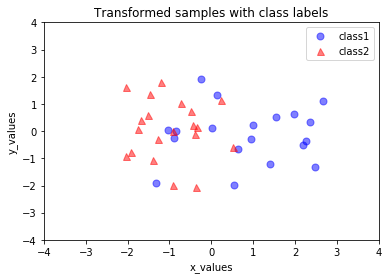

In [87]:

plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()